## Introduction to Google Page Rank Algorithm 
### Simulation and Modeling Using Markov Chains

Suppose the world wide web is composed of only six websites. Yep, just six. Here is a graph of the world wide web:

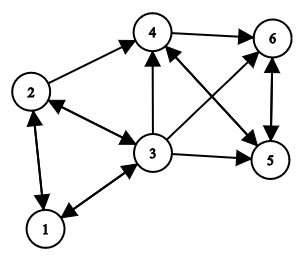

In [1]:
from IPython.display import Image
Image(filename='GoogleRankGraph.png')

Thank you to https://csacademy.com/app/graph_editor/ for providing a nice graph editor.

Each node is a website and each edge is a link. How can we rank these websites? One option would be to pick a starting website and randomly crawl through links, keeping track of how many times each site has been visited, then use the proportion as an estimate for the 'importance' of the site. Pay careful attention to how this would perform on the above graph. Do you see any problems we need to address?

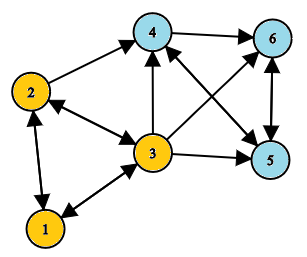

In [2]:
Image(filename='GoogleRankGraphClasses.png')

We would not give a proper ranking to sites 1, 2, and 3 since it is not possible to go from any blue site to a yellow site. One work-around would be to, at each jump from one site to another, have a chance of going to any website, regardless of direct links. We will describe this graph using a Markov transition matrix and use that model for a simulation. Alternatively, one could construct a graph data structure for simulation.

Define

$p=0.9, \; q=0.1$
$$
    A =  \left(
    \begin{array}{cc}
        0   &   \frac{1}{2}   &   \frac{1}{2}   &   0   & 0   & 0    \\
        \frac{1}{3} &    0   &  \frac{1}{3}  &  \frac{1}{3} &  0 &  0  \\
        \frac{1}{6}   &   \frac{1}{6} &  \frac{1}{6}   &  \frac{1}{6}  & \frac{1}{6} & \frac{1}{6} \\
           0 &    0    &   0  &     0  & \frac{1}{2}  & \frac{1}{2} \\
           0  &    0    &   0    &   \frac{1}{2}   &   0   & \frac{1}{2} \\
         0 & 0 & 0 & 0  & 1 & 0
    \end{array}
    \right)
$$

$$ B =  \left( 
        \begin{array}{cc}
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
\end{array}
\right)
$$

Our Transition matrix $P=pA+qB$.

The matrix $A$ represents transition probabilities from one site to another. Row $i$, column $j$ of $A$ represents the probability of a user going from site $i$ to site $j$ in one step. We include the matrix $B$ to get users out of recurrent communication classes.

The value of $P$ is 

$$ P =  \left( 
        \begin{array}{cc}
        \frac{1}{60} & \frac{7}{15} & \frac{7}{15} & \frac{1}{60} & \frac{1}{60} & \frac{1}{60} \\
        \frac{19}{60} & \frac{1}{60} & \frac{19}{60} & \frac{19}{60} & \frac{1}{60} & \frac{1}{60} \\
        \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \\
        \frac{1}{60} & \frac{1}{60} & \frac{1}{60} & \frac{1}{60} & \frac{7}{15} & \frac{7}{15} \\
        \frac{1}{60} & \frac{1}{60} & \frac{1}{60} & \frac{7}{15} & \frac{1}{60} & \frac{7}{15} \\
        \frac{1}{60} & \frac{1}{60} & \frac{1}{60} & \frac{1}{60} & \frac{11}{12} & \frac{1}{60} \\
\end{array}
\right)
$$

An interesting property of $P$ is that, row $i$ column $j$ of $P^n$ gives the probability of having gone from site $i$ to site $j$ in $n$ steps. If $n$ is "large", then the $i,j$ entry of $P^n$ approximates the long-term likelihood that we will end up at site $j$ from site $i$. We will pick $n=10,000$.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
np.set_printoptions(precision=4)
P = np.array(  [ [ 1/60.0  , 7/15.0  , 7/15.0    , 1/60.0   , 1/60.0  , 1/60.0 ],
                 [ 19/60.0 , 1/60.0  , 19/60.0   , 19/60.0  , 1/60.0  , 1/60.0 ],
                 [ 1/6.0   , 1/6.0   , 1/6.0     , 1/6.0    , 1/6.0   , 1/6.0  ],
                 [ 1/60.0  , 1/60.0  , 1/60.0    , 1/60.0   , 7/15.0  , 7/15.0 ],
                 [ 1/60.0  , 1/60.0  , 1/60.0    , 7/15.0   , 1/60.0  , 7/15.0 ],
                 [ 1/60.0  , 1/60.0  , 1/60.0    , 1/60.0   , 11/12.0 , 1/60.0 ]  ] )
print("P^10,000 = " + "\n", np.linalg.matrix_power(P,10000))

P^10,000 = 
 [[0.0372 0.0415 0.054  0.206  0.3751 0.2862]
 [0.0372 0.0415 0.054  0.206  0.3751 0.2862]
 [0.0372 0.0415 0.054  0.206  0.3751 0.2862]
 [0.0372 0.0415 0.054  0.206  0.3751 0.2862]
 [0.0372 0.0415 0.054  0.206  0.3751 0.2862]
 [0.0372 0.0415 0.054  0.206  0.3751 0.2862]]


Notice that each row of $P^n$ is equivalent. That is interesting. Why is that? We can interpret this to mean that regardless of which site a user starts at, we can estimate the likelihood that the user will end up at a particular site. The probability will be used as a ranking. The greater the likelihood that we end up at a particular site over a long period of time, the greater the ranking.

Formally, one can compute the exact long-term behavior, or stationary distribution, of this by computing the row vector $\pi$ which satisfies the following system of equations $\pi = \pi P$ and $\sum_i \pi_i = 1$.

Thus our ranking of sites from highest rank to lowest rank is:  5, 6, 4, 3, 2, 1

$$
\begin{array}{c|c|c|c|c|c}
5 & 6 & 4 & 3 & 2 & 1 \\
\hline
0.3751 & 0.2862 & 0.2060 & 0.0540 & 0.0415 & 0.0372 
\end{array}
$$

Below, we give code for simulating a random crawl through the websites.

In [4]:
# Returns a numpy array where array[i] is the rank of site i+1
def page_rank(num_steps, start_site):
    count = _get_count_simulation(num_steps, start_site)
    return count/np.sum(count)

# Returns a numpy array where array[i] is the number of times site i+1 has been visited
def _get_count_simulation(num_steps, start_site):
    count = np.zeros(6) 
    site_currently_on_index = start_site - 1
    for i in range(num_steps):
        '''
        Let x be our current site index. Randomly determine which site to visit next. 
        Accomplish this by determing which bin a uniform(0,1) random num falls into.
        bins: [0, P[x,0]], (P[x,0], P[x,0]+P[x,1]], ... , (P[x,0]+...+P[x,4], P[x,0]+...+P[x,5]]
        The naive approach, a linear search, is used to find the bin.
        '''
        rand_num = np.random.uniform(0,1)
        bin_end_value = 0
        for j in range(6):
            bin_end_value += P[site_currently_on_index, j]
            if rand_num <= bin_end_value:
                site_currently_on_index = j
                count[j] += 1
                break
    return count

### Simulation Results

Total counts = [ 365.  401.  547. 2062. 3770. 2855.]
Sum of counts = 10000.0
Page Rank = [0.0365 0.0401 0.0547 0.2062 0.377  0.2855]


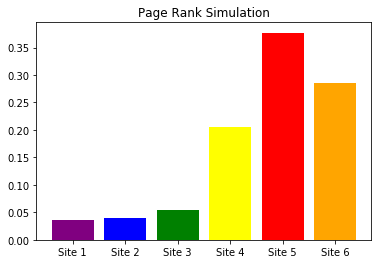

In [5]:
num_steps = 10_000
start_site = 4

rank = page_rank(num_steps, start_site)

x_axis=['Site 1','Site 2', 'Site 3', 'Site 4', 'Site 5', 'Site 6']
y_pos = np.arange(len(x_axis))  
plt.bar(y_pos, rank, align = 'center',
        color=['purple','blue','green','yellow','red','orange'])
plt.title('Page Rank Simulation')
plt.xticks(y_pos,x_axis)

print("Total counts =", rank*num_steps)
print("Sum of counts =", sum(rank*num_steps))
print("Page Rank =", rank)

Which is consistent with our known rank

$
\begin{array}{c|c|c|c|c|c}
1 & 2 & 3 & 4 & 5 & 6 \\
\hline
0.0372 & 0.0415 & 0.0540 & 0.2060 & 0.3751 & 0.2862 
\end{array}
$

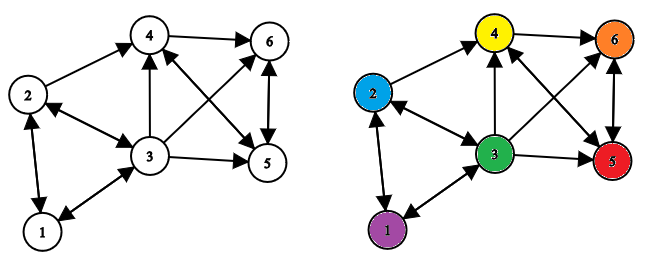

In [6]:
Image(filename='GoogleRankGraphResults.png')